In [1]:
import json
import matplotlib.pyplot as plt

summary_score_path = "summary_score.json"
log_history_path = "log_history.json"

with open(summary_score_path,'r') as fp:
    summary_score = json.load(fp)

with open(log_history_path,'r') as fp:
    log_history = json.load(fp)

In [3]:
list(summary_score.keys())

['t5-base',
 'google/mt5-base',
 'google/flan-t5-base',
 'google/t5-v1_1-base',
 'google/t5-efficient-base',
 'google/long-t5-local-base',
 'facebook/bart-base',
 'openai-gpt',
 'google/byt5-base',
 'gpt2-medium',
 'Nicki/gpt3-base',
 'facebook/xglm-564M',
 'ai-forever/mGPT']

In [4]:
list(log_history.keys())

['t5-base',
 'google/mt5-base',
 'google/flan-t5-base',
 'google/t5-v1_1-base',
 'google/t5-efficient-base',
 'google/long-t5-local-base',
 'facebook/bart-base',
 'openai-gpt',
 'google/byt5-base',
 'gpt2-medium',
 'Nicki/gpt3-base',
 'facebook/xglm-564M',
 'ai-forever/mGPT']

# Score Analysis

In [5]:
summary_score["t5-base"]

{'rest15-aos': 0.5502239283429302,
 'rest15-cs': 0.6818181818181819,
 'rest16-aos': 0.6217228464419475,
 'rest16-cs': 0.7723214285714286}

In [8]:
# Extract the model names
models = list(summary_score.keys())

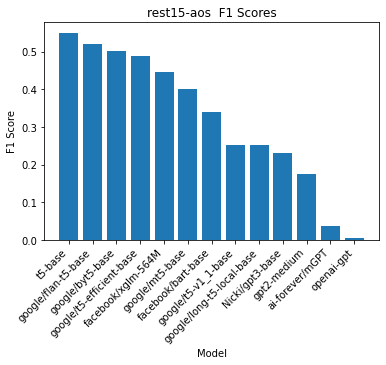

In [10]:
rest15_aos_models = sorted(models, key=lambda x: summary_score[x]['rest15-aos'], reverse=True)

task = "rest15-aos"

plt.bar(rest15_aos_models, [summary_score[model][task] for model in rest15_aos_models])
plt.title(f'{task}  F1 Scores')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1 Score')

plt.show()

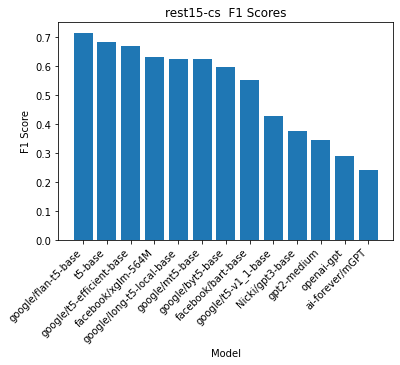

In [11]:
rest15_cs_models = sorted(models, key=lambda x: summary_score[x]['rest15-cs'], reverse=True)

task = "rest15-cs"

plt.bar(rest15_cs_models, [summary_score[model][task] for model in rest15_cs_models])
plt.title(f'{task}  F1 Scores')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1 Score')

plt.show()

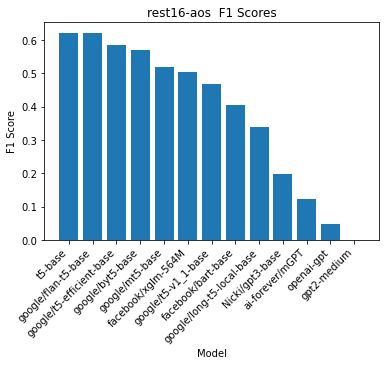

In [12]:
rest16_aos_models = sorted(models, key=lambda x: summary_score[x]['rest16-aos'], reverse=True)

task = "rest16-aos"

plt.bar(rest16_aos_models, [summary_score[model][task] for model in rest16_aos_models])
plt.title(f'{task}  F1 Scores')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1 Score')

plt.show()

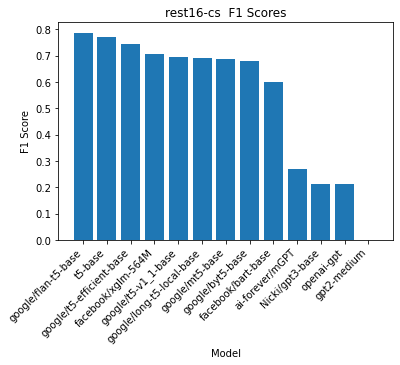

In [13]:
rest16_cs_models = sorted(models, key=lambda x: summary_score[x]['rest16-cs'], reverse=True)

task = "rest16-cs"

plt.bar(rest16_cs_models, [summary_score[model][task] for model in rest16_cs_models])
plt.title(f'{task}  F1 Scores')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1 Score')

plt.show()

In [14]:
summary_score["t5-base"]

{'rest15-aos': 0.5502239283429302,
 'rest15-cs': 0.6818181818181819,
 'rest16-aos': 0.6217228464419475,
 'rest16-cs': 0.7723214285714286}

In [15]:
summary_score["google/flan-t5-base"]

{'rest15-aos': 0.5199240986717267,
 'rest15-cs': 0.7151424287856071,
 'rest16-aos': 0.6202219482120838,
 'rest16-cs': 0.7865003668378576}

In [18]:
t5_vs_flan_t5 = {}
for key in summary_score["t5-base"].keys():
    t5_vs_flan_t5[key] = summary_score["t5-base"][key] - summary_score["google/flan-t5-base"][key]

In [19]:
t5_vs_flan_t5

{'rest15-aos': 0.030299829671203482,
 'rest15-cs': -0.0333242469674252,
 'rest16-aos': 0.0015008982298637674,
 'rest16-cs': -0.01417893826642902}

# Training History

In [20]:
log_history["t5-base"]

{'rest15-aos': 0.5502239283429302,
 'rest15-cs': 0.6818181818181819,
 'rest16-aos': 0.6217228464419475,
 'rest16-cs': 0.7723214285714286}

# Error Analysis

In [21]:
import pandas as pd

In [30]:
aos_prompt = "Extract with the format ( <A> , <O> , <S> ) for the following text:"

def cut_prompt(text):
    result = text.replace(aos_prompt,'')
    result = result.strip()
    return result

## Restaurant 2015

In [64]:
t5_pred_path = "./preds/t5-base_rest15_pred.csv"
flan_t5_pred_path = "./preds/google-flan-t5-base_rest15_pred.csv"
t5_str_pred_path = "./preds/t5-base_rest15str_pred.csv"
flan_t5_str_pred_path = "./preds/google-flan-t5-base_rest15str_pred.csv"

t5_pred = pd.read_csv(t5_pred_path)
flan_t5_pred = pd.read_csv(flan_t5_pred_path)
t5_str_pred = pd.read_csv(t5_str_pred_path)
flan_t5_str_pred = pd.read_csv(flan_t5_str_pred_path)

In [65]:
t5_pred.shape

(1074, 5)

In [66]:
t5_str_pred.shape

(537, 2)

In [67]:
t5_pred.head()

,input,output,task,target,prediction
0,"Extract with the format ( <A> , <O> , <S> ) fo...","( food , Gross , negative )",aos,"[{'aspect': 'food', 'opinion': 'Gross', 'senti...","[{'aspect': 'food', 'opinion': 'Gross', 'senti..."
1,"Extract with the format ( <A> , <O> , <S> ) fo...","( NULL , alright , neutral )",aos,"[{'aspect': 'NULL', 'opinion': 'alright', 'sen...","[{'aspect': 'NULL', 'opinion': 'alright', 'sen..."
2,"Extract with the format ( <A> , <O> , <S> ) fo...","( place , Great , positive )",aos,"[{'aspect': 'place', 'opinion': 'Great', 'sent...","[{'aspect': 'place', 'opinion': 'Great', 'sent..."
3,"Extract with the format ( <A> , <O> , <S> ) fo...","( decor , distraction , neutral ) ; ( eggplant...",aos,"[{'aspect': 'decor', 'opinion': 'distraction',...","[{'aspect': 'decor', 'opinion': 'distraction',..."
4,"Extract with the format ( <A> , <O> , <S> ) fo...","( quacamole , yummy , positive ) ; ( wings wit...",aos,"[{'aspect': 'quacamole', 'opinion': 'yummy', '...","[{'aspect': 'quacamole', 'opinion': 'yummy', '..."


In [68]:
flan_t5_pred.head()

,input,output,task,target,prediction
0,"Extract with the format ( <A> , <O> , <S> ) fo...","( food , Gross , negative )",aos,"[{'aspect': 'food', 'opinion': 'Gross', 'senti...","[{'aspect': 'food', 'opinion': 'Gross', 'senti..."
1,"Extract with the format ( <A> , <O> , <S> ) fo...","( NULL , alright , neutral )",aos,"[{'aspect': 'NULL', 'opinion': 'alright', 'sen...","[{'aspect': 'NULL', 'opinion': 'alright', 'sen..."
2,"Extract with the format ( <A> , <O> , <S> ) fo...","( place , Great , positive )",aos,"[{'aspect': 'place', 'opinion': 'Great', 'sent...","[{'aspect': 'place', 'opinion': 'Great', 'sent..."
3,"Extract with the format ( <A> , <O> , <S> ) fo...","( decor , distraction , neutral ) ; ( eggplant...",aos,"[{'aspect': 'decor', 'opinion': 'distraction',...","[{'aspect': 'decor', 'opinion': 'distraction',..."
4,"Extract with the format ( <A> , <O> , <S> ) fo...","( quacamole , yummy , positive ) ; ( wings wit...",aos,"[{'aspect': 'quacamole', 'opinion': 'yummy', '...","[{'aspect': 'quacamole at pacifico', 'opinion'..."


In [69]:
t5_str_pred.head()

,aos_extraction,cs_extraction
0,"( food, Gross, positive )","( food quality, positive )"
1,"( NULL, alright, neutral )","( restaurant general, positive )"
2,"( place, Great, positive )","( ambience general, positive )"
3,"( decor, distraction, negative )","( ambience general, negative )"
4,"( quacamole, yummy, positive ) ; ( wings, yumm...","( food quality, positive )"


In [70]:
flan_t5_str_pred.head()

,aos_extraction,cs_extraction
0,"( food, Gross, negative )","( food quality, positive )"
1,"( NULL, alright, positive )","( restaurant general, neutral )"
2,"( place, Great, positive )","( ambience general, positive )"
3,"( decor, distraction, negative )","( ambience general, negative )"
4,"( quacamole at pacifico, yummy, positive ) ; (...","( food quality, positive )"


In [71]:
comparison_15 = pd.DataFrame()
comparison_15["text"] = t5_pred.loc[:t5_str_pred.shape[0]-1,"input"].apply(cut_prompt)
comparison_15["target_aos"] = t5_pred.loc[:t5_str_pred.shape[0]-1,"output"]
comparison_15["target_cs"] = t5_pred.loc[t5_str_pred.shape[0]:].reset_index()["output"]

comparison_15["t5_str_pred_aos"] = t5_str_pred["aos_extraction"]
comparison_15["flan_t5_str_pred_aos"] = flan_t5_str_pred["aos_extraction"]

comparison_15["t5_str_pred_cs"] = t5_str_pred["cs_extraction"]
comparison_15["flan_t5_str_pred_cs"] = flan_t5_str_pred["cs_extraction"]

In [72]:
comparison_15.to_csv("comparison_15.csv",index=False)

## Restaurant 2016

In [73]:
t5_pred_path = "./preds/t5-base_rest16_pred.csv"
flan_t5_pred_path = "./preds/google-flan-t5-base_rest16_pred.csv"
t5_str_pred_path = "./preds/t5-base_rest16str_pred.csv"
flan_t5_str_pred_path = "./preds/google-flan-t5-base_rest16str_pred.csv"

t5_pred = pd.read_csv(t5_pred_path)
flan_t5_pred = pd.read_csv(flan_t5_pred_path)
t5_str_pred = pd.read_csv(t5_str_pred_path)
flan_t5_str_pred = pd.read_csv(flan_t5_str_pred_path)

In [74]:
comparison_16 = pd.DataFrame()
comparison_16["text"] = t5_pred.loc[:t5_str_pred.shape[0]-1,"input"].apply(cut_prompt)
comparison_16["target_aos"] = t5_pred.loc[:t5_str_pred.shape[0]-1,"output"]
comparison_16["target_cs"] = t5_pred.loc[t5_str_pred.shape[0]:].reset_index()["output"]

comparison_16["t5_str_pred_aos"] = t5_str_pred["aos_extraction"]
comparison_16["flan_t5_str_pred_aos"] = flan_t5_str_pred["aos_extraction"]

comparison_16["t5_str_pred_cs"] = t5_str_pred["cs_extraction"]
comparison_16["flan_t5_str_pred_cs"] = flan_t5_str_pred["cs_extraction"]

In [75]:
comparison_16.to_csv("comparison_16.csv",index=False)